In [1]:
!pip install datasets

  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached propcache-0.3.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (12 kB)
  Using cached yarl-1.20.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (73 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.8/469.8 kB 4.4 MB/s eta 0:00:00a 0:00:01
Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl (15 kB)
Using cached aiosignal-1.4.0-py3-none-any.whl (7.5 kB)
Using cached propcache-0.3.2-cp312-cp312-macosx_11_0_arm64.whl (43 kB)
Using cached yarl-1.20.1-cp312-cp312-macosx_11_0_arm64.whl (89 kB)
  Attempting uninstall: aiosignal
    Found existing installation: aiosignal 1.2.0
    Uninstalling aiosignal-1.2.0:
      Successfully uninstalled aiosignal-1.2.0
  Attempting uninstall: yarl
    Found existing installation: yarl 1.9.3
    Uninstalling yarl-1.9.3:
      Successfully uninstalled yarl-1.9.3


In [87]:
from datasets import load_dataset
ds = load_dataset("solomonk/reddit_mental_health_posts")
ds2 = load_dataset("Nicolybgs/healthcare_data")

Repo card metadata block was not found. Setting CardData to empty.


healthcare_data.csv:   0%|          | 0.00/45.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/500000 [00:00<?, ? examples/s]

In [ ]:
# First dataset

In [21]:
ds

DatasetDict({
    train: Dataset({
        features: ['author', 'body', 'created_utc', 'id', 'num_comments', 'score', 'subreddit', 'title', 'upvote_ratio', 'url'],
        num_rows: 151288
    })
})

In [19]:
ds['train'].features

{'author': Value(dtype='string', id=None),
 'body': Value(dtype='string', id=None),
 'created_utc': Value(dtype='string', id=None),
 'id': Value(dtype='string', id=None),
 'num_comments': Value(dtype='int64', id=None),
 'score': Value(dtype='int64', id=None),
 'subreddit': Value(dtype='string', id=None),
 'title': Value(dtype='string', id=None),
 'upvote_ratio': Value(dtype='float64', id=None),
 'url': Value(dtype='string', id=None)}

In [17]:
print(ds['train'][0]) 

{'author': 'HotConversation1273', 'body': 'A few months ago I was accepted into this full time software engineering fellowship and it’s made me realize that I CANNOT work sustainably to save my life. It’s so hard to prioritize my time when I get so hyper focused on each task or just on something completely irrelevant. \n\nI was just diagnosed last year so I’m still learning how to learn with ADHD but I feel even more pressure to work so much harder to prove my worth bc I’m a Black woman in engineering. I’ve been falling into a really unhealthy cycle of taking more than my prescribed dose to work longer bc I’d waste so much time during the day and it’s just gotten out of hand. it’s like you go your whole life feeling so dumb and incompetent and now you don’t and you just wanna learn everything all the time but that’s just??? not sustainable or normal. anyways idk sorry for the rant, I’m just tired & don’t know what to do', 'created_utc': '2021-12-22T18:32:56.000Z', 'id': 'rmbjwb', 'num_

In [29]:
import pandas as pd
# profile the dataset, understand the structure, distribution, and patterns in the data. 
df = ds['train'].to_pandas()

Index(['author', 'body', 'created_utc', 'id', 'num_comments', 'score',
       'subreddit', 'title', 'upvote_ratio', 'url'],
      dtype='object')

In [45]:
df.columns

Index(['author', 'body', 'created_utc', 'id', 'num_comments', 'score',
       'subreddit', 'title', 'upvote_ratio', 'url'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151288 entries, 0 to 151287
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   author        151288 non-null  object 
 1   body          149679 non-null  object 
 2   created_utc   151288 non-null  object 
 3   id            151288 non-null  object 
 4   num_comments  151288 non-null  int64  
 5   score         151288 non-null  int64  
 6   subreddit     151288 non-null  object 
 7   title         151288 non-null  object 
 8   upvote_ratio  151288 non-null  float64
 9   url           151288 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 11.5+ MB


In [39]:
df.head()

,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url
0,HotConversation1273,A few months ago I was accepted into this full...,2021-12-22T18:32:56.000Z,rmbjwb,1,1,ADHD,I get extremely anxious if I’m not working 24/7,1.0,https://www.reddit.com/r/ADHD/comments/rmbjwb/...
1,snorefestt,"Hey guys, I was curious if anyone else has the...",2021-12-22T18:24:25.000Z,rmbd1y,3,5,ADHD,"I can't will myself to clean my own house, but...",1.0,https://www.reddit.com/r/ADHD/comments/rmbd1y/...
2,etyf12,\n\ni have 6 exams in the next 2 weeks one of...,2021-12-22T18:22:52.000Z,rmbbvu,1,2,ADHD,i need some help,1.0,https://www.reddit.com/r/ADHD/comments/rmbbvu/...
3,GetHairOrDieTryin,Is there anyone out there that is struggling w...,2021-12-22T18:20:35.000Z,rmba1t,3,2,ADHD,Anyone up for a chat?,1.0,https://www.reddit.com/r/ADHD/comments/rmba1t/...
4,ZeroTransPat,"Whenever I get hungry, I never eat because I d...",2021-12-22T18:18:47.000Z,rmb8lm,2,1,ADHD,Figuring out what to eat sucks,1.0,https://www.reddit.com/r/ADHD/comments/rmb8lm/...


In [47]:
df.describe()

,num_comments,score,upvote_ratio
count,151288.000000,151288.000000,151288.000000
mean,6.816317,17.477401,0.939577
std,30.266073,113.411191,0.125414
min,0.000000,0.000000,0.050000
25%,1.000000,1.000000,0.950000
50%,2.000000,2.000000,1.000000
75%,5.000000,6.000000,1.000000
max,2944.000000,6055.000000,1.000000


In [49]:
df['subreddit'].value_counts()

subreddit
OCD           42826
ADHD          37109
depression    24031
ptsd          24028
aspergers     23294
Name: count, dtype: int64

<Axes: >

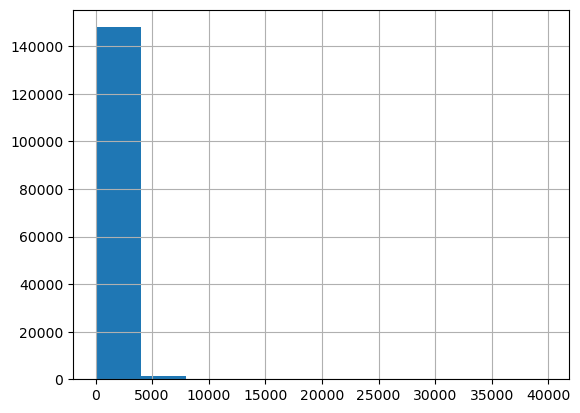

In [51]:
df['body'].str.len().hist()

In [ ]:
# Second dataset

In [89]:
ds2

DatasetDict({
    train: Dataset({
        features: ['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code', 'doctor_name', 'staff_available', 'patientid', 'Age', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Visitors with Patient', 'Insurance', 'Admission_Deposit', 'Stay (in days)'],
        num_rows: 500000
    })
})

In [91]:
ds2['train'].features

{'Available Extra Rooms in Hospital': Value(dtype='int64', id=None),
 'Department': Value(dtype='string', id=None),
 'Ward_Facility_Code': Value(dtype='string', id=None),
 'doctor_name': Value(dtype='string', id=None),
 'staff_available': Value(dtype='int64', id=None),
 'patientid': Value(dtype='int64', id=None),
 'Age': Value(dtype='string', id=None),
 'gender': Value(dtype='string', id=None),
 'Type of Admission': Value(dtype='string', id=None),
 'Severity of Illness': Value(dtype='string', id=None),
 'health_conditions': Value(dtype='string', id=None),
 'Visitors with Patient': Value(dtype='int64', id=None),
 'Insurance': Value(dtype='string', id=None),
 'Admission_Deposit': Value(dtype='float64', id=None),
 'Stay (in days)': Value(dtype='int64', id=None)}

In [93]:
import pandas as pd
# profile the dataset, understand the structure, distribution, and patterns in the data. 
df2 = ds2['train'].to_pandas()

In [95]:
df2.columns

Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'patientid', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit',
       'Stay (in days)'],
      dtype='object')

In [99]:
df2.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [107]:
keep_column = ['Age', 'gender', 'Type of Admission', 'Severity of Illness',
    'health_conditions', 'Insurance', 'Admission_Deposit','Stay (in days)']
df2_clean = df2[keep_column]
df2_clean.head()

,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,Stay (in days)
0,41-50,Female,Trauma,Extreme,Diabetes,Yes,2966.408696,8
1,31-40,Female,Trauma,Minor,Heart disease,No,3554.835677,9
2,21-30,Female,Trauma,Extreme,Diabetes,Yes,5624.733654,7
3,31-40,Female,Urgent,Moderate,None,No,4814.149231,8
4,71-80,Male,Trauma,Moderate,Diabetes,No,5169.269637,34


In [117]:
import random
from faker import Faker

fake = Faker()

# Reddit-style post
reddit_post = {
    "title": fake.sentence(),
    "body": fake.paragraph(nb_sentences=5),
    "subreddit": random.choice(["r/depression", "r/ADHD", "r/ptsd", "ocd", "aspergers"]),
    "score": random.randint(0, 500),
    "num_comments": random.randint(0, 100)
}

# Select one random row from the healthcare data
random_health_row = df2_clean.sample(1).iloc[0]

# Merge the two
merged_record = {
    **reddit_post,
    "age": random_health_row["Age"],
    "gender": random_health_row["gender"],
    "diagnosis": random_health_row["health_conditions"],
    "severity": random_health_row["Severity of Illness"],
    "insurance": random_health_row["Insurance"],
    "stay_days": random_health_row["Stay (in days)"],
    "admission_type": random_health_row["Type of Admission"]
}

# View the result
merged_record


{'title': 'Face sing night sell.',
 'body': 'Choose activity feel realize six four. Choose song might something thought college may go. Phone writer apply lose argue rise. Consider might who market. Second important western better both member drive see.',
 'subreddit': 'aspergers',
 'score': 196,
 'num_comments': 79,
 'age': '21-30',
 'gender': 'Female',
 'diagnosis': 'Other',
 'severity': 'Moderate',
 'insurance': 'Yes',
 'stay_days': 9,
 'admission_type': 'Urgent'}

In [143]:
merged_records = []

for _ in range(100000):
    reddit_post = {
        "title": fake.sentence(),
        "body": fake.paragraph(nb_sentences=5),
        "subreddit": random.choice(["r/depression", "r/ADHD", "r/ptsd", "r/ocd", "r/aspergers"]),
        "score": random.randint(0, 500),
        "num_comments": random.randint(0, 100)
    }
    
    health_row = df2_clean.sample(1).iloc[0]
    
    merged_record = {
        **reddit_post,
        "age": health_row["Age"],
        "gender": health_row["gender"],
        "diagnosis": health_row["health_conditions"],
        "severity": health_row["Severity of Illness"],
        "insurance": health_row["Insurance"],
        "stay_days": health_row["Stay (in days)"],
        "admission_type": health_row["Type of Admission"]
    }
    
    merged_records.append(merged_record)


In [145]:
df_merged = pd.DataFrame(merged_records)
print(df_merged.isnull().sum())

title                 0
body                  0
subreddit             0
score                 0
num_comments          0
age                   0
gender                0
diagnosis         30304
severity              0
insurance             0
stay_days             0
admission_type        0
dtype: int64


In [147]:
df_clean = df_merged.fillna({'diagnosis': 'Other'})
print(df_clean.isnull().sum())

title             0
body              0
subreddit         0
score             0
num_comments      0
age               0
gender            0
diagnosis         0
severity          0
insurance         0
stay_days         0
admission_type    0
dtype: int64


In [149]:
# Export to CSV
df_clean.to_csv("synthetic_health_reddit_records.csv", index=False)

In [151]:
# Summary of numerical fields
print(df_clean.describe())

# Summary of all unique values (categorical)
for col in ['subreddit', 'gender', 'diagnosis', 'severity', 'admission_type', 'insurance']:
    print(f"\n--- {col} ---")
    print(df_clean[col].value_counts())


               score   num_comments      stay_days
count  100000.000000  100000.000000  100000.000000
mean      250.243020      50.038000      12.348130
std       144.910542      29.207967       7.871019
min         0.000000       0.000000       3.000000
25%       125.000000      25.000000       8.000000
50%       250.000000      50.000000       9.000000
75%       376.000000      75.000000      11.000000
max       500.000000     100.000000      50.000000

--- subreddit ---
subreddit
r/aspergers     20273
r/ptsd          19983
r/depression    19969
r/ocd           19942
r/ADHD          19833
Name: count, dtype: int64

--- gender ---
gender
Female    74026
Male      20712
Other      5262
Name: count, dtype: int64

--- diagnosis ---
diagnosis
Other                  48952
High Blood Pressure    15806
Diabetes               15049
Asthama                13143
Heart disease           7050
Name: count, dtype: int64

--- severity ---
severity
Moderate    55843
Minor       26381
Extreme     1777

In [157]:
import pandas as pd

df_parquet = pd.read_csv(r'/Users/brianwang/Desktop/synthetic_health_reddit_records.csv')
df_parquet.to_parquet('synthetic_health_reddit_records.parquet', compression='snappy')